# Poverty in Brazil Analysis from 2016 - 2020

## Topics to analyse

### Poverty by gender:

### 1 - Gender
### 2 - Age
### 3 - Education
### 4 - Region
### 5 - Skin Color
### 6 - Work Situation
### 7 - Poverty

In [1]:
# Import the library 
import pandas as pd

In [3]:
df = pd.read_csv('C:/Andre files/Brazil Poverty/archive/poverty_brazil.csv')
df

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


### Data cleaning and preparation

#### - Look at some information about this data
#### - Fix any missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20752 entries, 0 to 20751
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   woman              20752 non-null  int64  
 1   age                20752 non-null  int64  
 2   education          20752 non-null  int64  
 3   work               20752 non-null  int64  
 4   metropolitan_area  20752 non-null  int64  
 5   non_white          20751 non-null  float64
 6   urban              20752 non-null  int64  
 7   work_permit        20752 non-null  int64  
 8   poverty            20752 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.4 MB


In [7]:
df.describe()

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
count,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20751.000000,20752.000000,20752.000000,20752.000000
mean,0.393552,40.861845,4.533009,5.342907,0.370519,0.545612,0.786671,1.264746,0.224942
std,0.488549,12.598501,1.891997,3.174946,0.482955,0.497927,0.409668,0.747717,0.417554
min,0.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,40.000000,5.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,50.000000,6.000000,8.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000,91.000000,7.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [8]:
# Let's now find all numeric variables
numerics = ['int64', 'int32', 'int64', 'float64', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
len(num_df.columns)

9

In [9]:
# Percentages of missing values
df.isna().sum().sort_values(ascending=False)

non_white            1
woman                0
age                  0
education            0
work                 0
metropolitan_area    0
urban                0
work_permit          0
poverty              0
dtype: int64

In [23]:
# Dropping missing values - In this case only 1 row.
data = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#### Gender

In [24]:
# Female = 1 not female = 0
data.woman

0        0
1        0
2        0
3        1
4        1
        ..
20747    1
20748    0
20749    0
20750    1
20751    0
Name: woman, Length: 20751, dtype: int64

In [25]:
# Let's get the gender types
gender_type = df.woman.unique()
len(gender_type)

2

In [26]:
# Gender within the dataset
gender_division = data.woman.value_counts()
gender_division

0    12584
1     8167
Name: woman, dtype: int64

<AxesSubplot:>

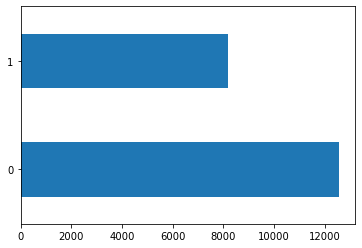

In [27]:
# Let's plot this
gender_division.plot(kind='barh')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='woman', ylabel='Density'>

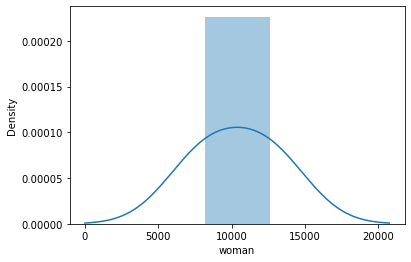

In [28]:
import seaborn as sns

sns.distplot(gender_division) # Normally distributed 

In [29]:
Male = gender_division[0]
Female = gender_division[1]
Total = 20751

print(Male, Female)

12584 8167


In [30]:
Male / Total * 100

60.64286058503205

In [31]:
Female / Total * 100

39.35713941496795

<AxesSubplot:ylabel='woman'>

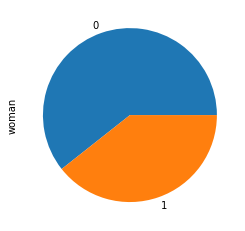

In [32]:
gender_division.plot(kind = 'pie')

In [ ]:
# 60% of the dataset is composed by Men and 40% by Women 

#### Age

In [33]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [34]:
data.age

0        59
1        21
2        59
3        58
4        56
         ..
20747    46
20748    47
20749    41
20750    42
20751    49
Name: age, Length: 20751, dtype: int64

In [38]:
data.age.mean()


40.861018746084525

In [39]:
data.age.median()

40.0

In [40]:
# Let's get the age types
age_type = data.age.unique()
len(age_type)

76

In [41]:
# Age per type
Age_type = data.age.value_counts()
Age_type

38    630
40    625
41    618
39    592
36    585
     ... 
85      1
91      1
89      1
86      1
87      1
Name: age, Length: 76, dtype: int64

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

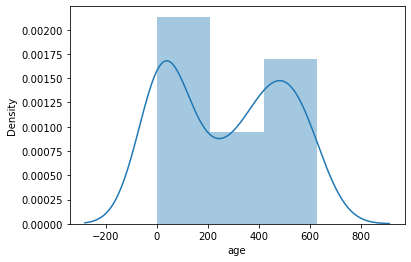

In [44]:
sns.distplot(Age_type) 

In [ ]:
# The average age of the dataset is 40 years old 

#### Education


In [45]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [47]:
data.education
# 1 - No education and less than 1 year of study
# 2 - Incomplete elementary or equivalent
# 3 - Complete fundamental or equivalent
# 4 - Incomplete audio or equivalent
# 5 - Complete audio or equivalent
# 6 - Incomplete higher or equivalent
# 7 - Superior complete

0        5
1        5
2        2
3        5
4        2
        ..
20747    4
20748    1
20749    7
20750    7
20751    5
Name: education, Length: 20751, dtype: int64

In [62]:
data.education.mean()

4.532889981205725

In [63]:
# Let's get the Education types
edu_type = data.education.unique()
len(edu_type)

7

In [64]:
# Education per type
Education_Type = data.education.value_counts()
Education_Type

5    6644
2    4913
7    4886
3    1583
6    1181
4    1145
1     399
Name: education, dtype: int64

<AxesSubplot:>

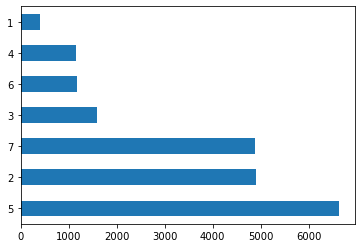

In [65]:
# Let's plot this
Education_Type.plot(kind='barh')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

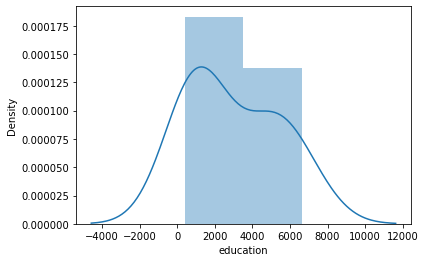

In [66]:
sns.distplot(Education_Type)

In [67]:
No_edu = Education_Type[1]
Incomplete_elementary = Education_Type[2]
Complete_fundamental = Education_Type[3]
Incomplete_audio = Education_Type[4]
Complete_audio = Education_Type[5]
Incomplete_higher = Education_Type[6]
Complete_superior = Education_Type[7]


Total = 20751

print(No_edu, Incomplete_elementary, Complete_fundamental, Incomplete_audio, Complete_audio, Incomplete_higher, Complete_superior)

399 4913 1583 1145 6644 1181 4886


In [68]:
No_edu / Total *100

1.9227989012577706

In [69]:
Incomplete_elementary / Total*100

23.67596742325671

In [70]:
Complete_fundamental/Total*100

7.628548021782083

In [71]:
Incomplete_audio/Total*100

5.517806370777311

In [72]:
Complete_audio/Total*100

32.01773408510433

In [73]:
Incomplete_higher/Total*100

5.691291985928389

In [74]:
Complete_superior/Total*100

23.5458532118934

In [ ]:
# 32% do have a complete basic education 23% with Incomplete basic and 23% with superior education. 

#### Region

In [75]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [76]:
data.metropolitan_area

0        1
1        1
2        1
3        1
4        1
        ..
20747    1
20748    1
20749    1
20750    1
20751    1
Name: metropolitan_area, Length: 20751, dtype: int64